In [1]:
# Untuk analisis dan mengolah data
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Untuk pembelajaran
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import classification_report
# Untuk plot confussion matrix yang lebih baik
import itertools

In [2]:
# Path menuju file dataset training
file_path = 'Tubes2-AI/tubes2_HeartDisease_train.csv'

# Header kolom
headers = ['age', 'sex', 'CTP', 'RBP','SC', 'FBS','rECG', 'MHR', 'EIA','STDI','PE_ST', 'n_MV','thal', 'diagnosis']

# Membaca dataset training
train_dataset = pd.read_csv(file_path, header=None, engine='python', skiprows=1, na_values='?', names=headers)
train_dataset.head(15)

,age,sex,CTP,RBP,SC,FBS,rECG,MHR,EIA,STDI,PE_ST,n_MV,thal,diagnosis
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3
5,64,0,4,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
6,63,1,4,130.0,308.0,0.0,0.0,138.0,1.0,2.0,2.0,NaN,NaN,2
7,58,1,2,130.0,251.0,0.0,0.0,110.0,0.0,0.0,NaN,NaN,NaN,0
8,42,1,2,150.0,268.0,0.0,0.0,136.0,0.0,0.0,NaN,NaN,NaN,0
9,54,1,3,120.0,258.0,0.0,2.0,147.0,0.0,4.0,2.0,0.0,7.0,0


In [3]:
# Memisahkan dataset menjadi 2 kelompok
train_dataset_0 = train_dataset[train_dataset['diagnosis'] == 0].copy()
train_dataset_1 = train_dataset[train_dataset['diagnosis'] == 1].copy()
train_dataset_2 = train_dataset[train_dataset['diagnosis'] == 2].copy()
train_dataset_3 = train_dataset[train_dataset['diagnosis'] == 3].copy()
train_dataset_4 = train_dataset[train_dataset['diagnosis'] == 4].copy()

# Menyimpan nilai modus setiap atribut untuk kedua kelompok
dataset_0_modes = train_dataset_0.mode().iloc[0]
dataset_0_modes.name = 'mode'
dataset_1_modes = train_dataset_1.mode().iloc[0]
dataset_1_modes.name = 'mode'
dataset_2_modes = train_dataset_2.mode().iloc[0]
dataset_2_modes.name = 'mode'
dataset_3_modes = train_dataset_3.mode().iloc[0]
dataset_3_modes.name = 'mode'
dataset_4_modes = train_dataset_4.mode().iloc[0]
dataset_4_modes.name = 'mode'

# Menampilkan nilai modus setiap atribut untuk kedua kelompok
display(pd.Series.to_frame(dataset_0_modes))
display(pd.Series.to_frame(dataset_1_modes))
display(pd.Series.to_frame(dataset_2_modes))
display(pd.Series.to_frame(dataset_3_modes))
display(pd.Series.to_frame(dataset_4_modes))

,mode
age,54.0
sex,1.0
CTP,2.0
RBP,120.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,140.0
EIA,0.0
STDI,0.0


,mode
age,56.0
sex,1.0
CTP,4.0
RBP,140.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,150.0
EIA,1.0
STDI,0.0


,mode
age,62.0
sex,1.0
CTP,4.0
RBP,140.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,140.0
EIA,1.0
STDI,0.0


,mode
age,61.0
sex,1.0
CTP,4.0
RBP,120.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,120.0
EIA,1.0
STDI,0.0


,mode
age,58.0
sex,1.0
CTP,4.0
RBP,150.0
SC,0.0
FBS,0.0
rECG,2.0
MHR,120.0
EIA,1.0
STDI,4.0


In [4]:
# Mengisi nilai atribut yang tidak diketahui
train_dataset_0.fillna(dataset_0_modes, inplace=True)
train_dataset_1.fillna(dataset_1_modes, inplace=True)
train_dataset_2.fillna(dataset_2_modes, inplace=True)
train_dataset_3.fillna(dataset_3_modes, inplace=True)
train_dataset_4.fillna(dataset_4_modes, inplace=True)

# Menggabungkan kembali kedua kelompok
train_dataset = pd.concat([train_dataset_0, train_dataset_1, train_dataset_2, train_dataset_3, train_dataset_4])
train_dataset

,age,sex,CTP,RBP,SC,FBS,rECG,MHR,EIA,STDI,PE_ST,n_MV,thal,diagnosis
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,1.0,0.0,3.0,0
5,64,0,4,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
7,58,1,2,130.0,251.0,0.0,0.0,110.0,0.0,0.0,1.0,0.0,3.0,0
8,42,1,2,150.0,268.0,0.0,0.0,136.0,0.0,0.0,1.0,0.0,3.0,0
9,54,1,3,120.0,258.0,0.0,2.0,147.0,0.0,4.0,2.0,0.0,7.0,0
13,55,0,2,132.0,342.0,0.0,0.0,166.0,0.0,12.0,1.0,0.0,3.0,0
21,45,0,2,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0
24,51,0,3,120.0,295.0,0.0,2.0,157.0,0.0,6.0,1.0,0.0,3.0,0
25,53,1,3,155.0,175.0,1.0,1.0,160.0,0.0,0.0,1.0,0.0,6.0,0


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 2 to 739
Data columns (total 14 columns):
age          779 non-null int64
sex          779 non-null int64
CTP          779 non-null int64
RBP          779 non-null float64
SC           779 non-null float64
FBS          779 non-null float64
rECG         779 non-null float64
MHR          779 non-null float64
EIA          779 non-null float64
STDI         779 non-null float64
PE_ST        779 non-null float64
n_MV         779 non-null float64
thal         779 non-null float64
diagnosis    779 non-null int64
dtypes: float64(10), int64(4)
memory usage: 91.3 KB


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## Naive-Bayes

Mencoba melakukan eksekusi tanpa mengubah dataset

Fold 1
Confusion matrix:


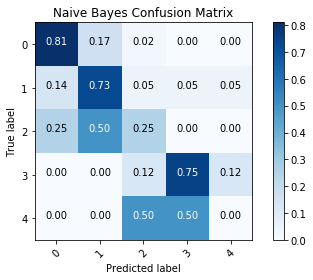


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 2
Confusion matrix:


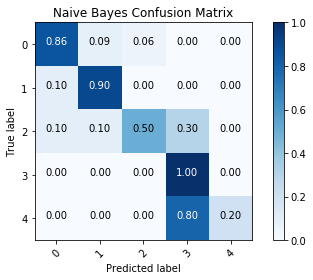


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 3
Confusion matrix:


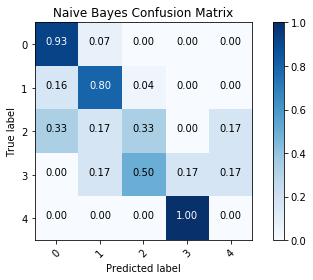


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 4
Confusion matrix:


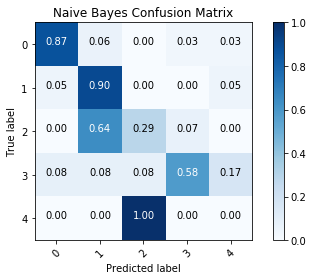


Prediction Performance Measurement

> Accuracy = 71.8%

Fold 5
Confusion matrix:


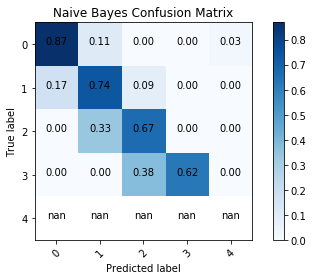


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 6
Confusion matrix:


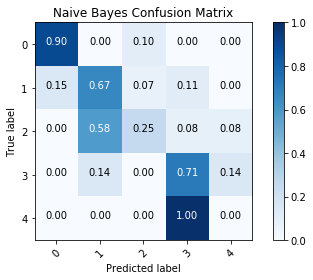


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 7
Confusion matrix:


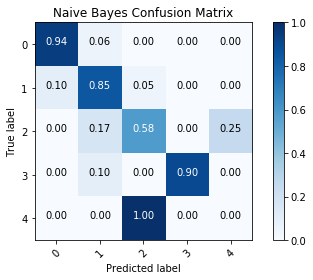


Prediction Performance Measurement

> Accuracy = 84.6%

Fold 8
Confusion matrix:


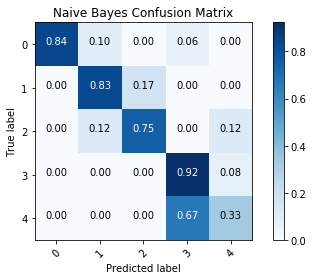


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 9
Confusion matrix:


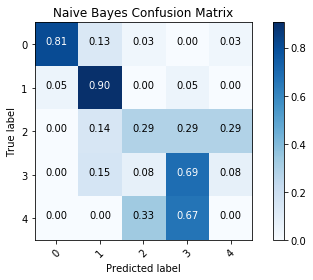


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 10
Confusion matrix:


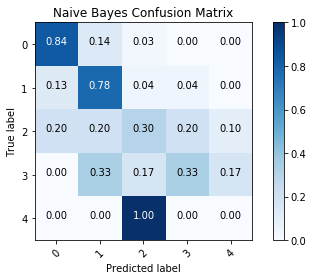


Prediction Performance Measurement

> Accuracy = 70.1%

Akurasi rata-rata: 0.7534632034632034


In [7]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

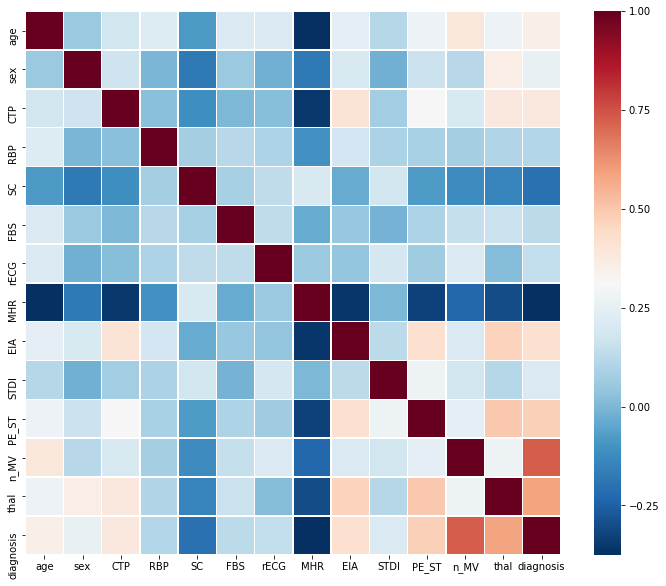

In [8]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

In [9]:
# Hitung Korelasi age
train_dataset['age'].corr(train_dataset['diagnosis'])

0.3550066873718207

In [10]:
# Hitung Korelasi sex
train_dataset['sex'].corr(train_dataset['diagnosis'])

0.2591122494555672

In [11]:
# Hitung Korelasi CTP
train_dataset['CTP'].corr(train_dataset['diagnosis'])

0.3878274369182737

In [12]:
# Hitung Korelasi RBP
train_dataset['RBP'].corr(train_dataset['diagnosis'])

0.11137107206014431

In [13]:
# Hitung Korelasi SC
train_dataset['SC'].corr(train_dataset['diagnosis'])

-0.20038983001347355

In [14]:
# Hitung Korelasi FBS
train_dataset['FBS'].corr(train_dataset['diagnosis'])

0.129593427469479

In [15]:
# Hitung Korelasi rECG
train_dataset['rECG'].corr(train_dataset['diagnosis'])

0.14499388173393105

In [16]:
# Hitung Korelasi MHR
train_dataset['MHR'].corr(train_dataset['diagnosis'])

-0.37246697322978306

In [17]:
# Hitung Korelasi EIA
train_dataset['EIA'].corr(train_dataset['diagnosis'])

0.42327819745971623

In [18]:
# Hitung Korelasi STDI
train_dataset['STDI'].corr(train_dataset['diagnosis'])

0.2097654187250043

In [19]:
# Hitung Korelasi PE_ST
train_dataset['PE_ST'].corr(train_dataset['diagnosis'])

0.4784404906403285

In [20]:
# Hitung Korelasi n_MV
train_dataset['n_MV'].corr(train_dataset['diagnosis'])

0.7304612379431802

In [21]:
# Hitung Korelasi thal
train_dataset['thal'].corr(train_dataset['diagnosis'])

0.590915434406582

Karena terdapat beberapa data seperti: **resting blood pressure, fasting blood sugar, resting ECG, ST depression induced by exercise relative to rest, serum cholestrol** yang korelasi terhadap diagnosis masih kurang dari **0.25** maka perlu dilakukan pengecekan pada sampel-sampel diatas. 

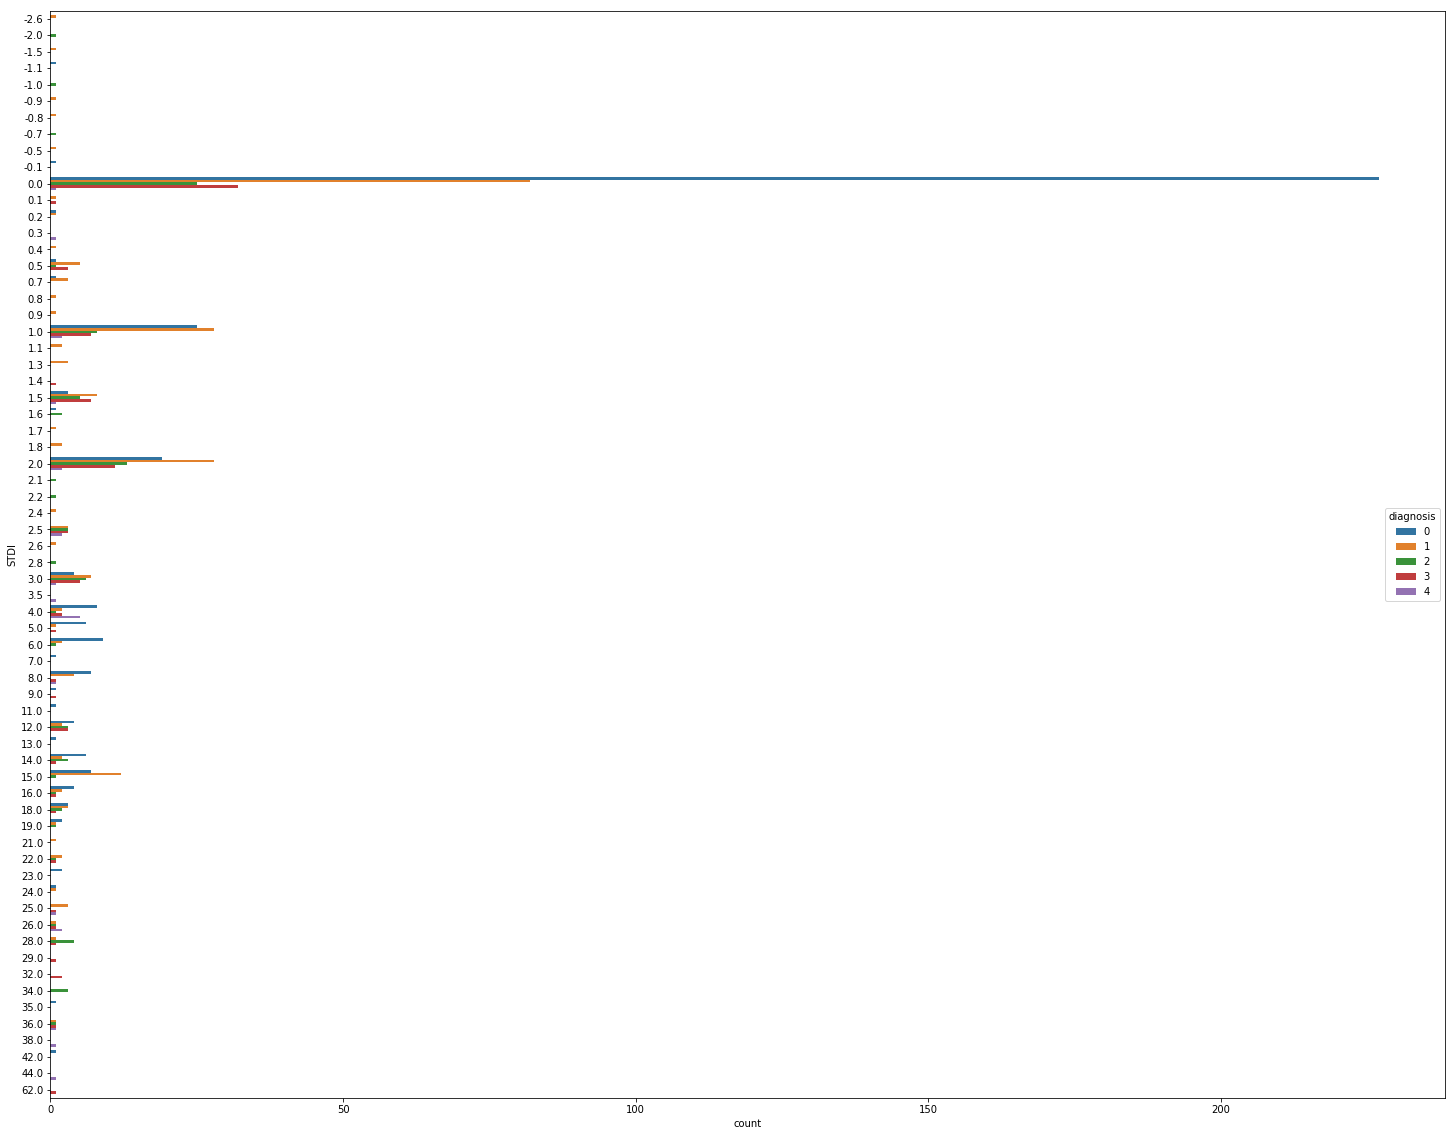

proportion (%)
diagnosis STDI                 
0          0.0        65.042980
           1.0         7.163324
           2.0         5.444126
           6.0         2.578797
           4.0         2.292264
           8.0         2.005731
           15.0        2.005731
           5.0         1.719198
           14.0        1.719198
           3.0         1.146132
           12.0        1.146132
           16.0        1.146132
           1.5         0.859599
           18.0        0.859599
           19.0        0.573066
           23.0        0.573066
          -1.1         0.286533
          -0.1         0.286533
           0.2         0.286533
           0.5         0.286533
           0.7         0.286533
           1.6         0.286533
           7.0         0.286533
           9.0         0.286533
           11.0        0.286533
           13.0        0.286533
           24.0        0.286533
           35.0        0.286533
           42.0        0.286533
1          0.0        36.444444
...                         ...
3          0.1         1.111111
           1.4         1.111111
           5.0         1.111111
           8.0         1.111111
           9.0         1.111111
           14.0        1.111111
           16.0        1.111111
           18.0        1.111111
           22.0        1.111111
           25.0        1.111111
           26.0        1.111111
           28.0        1.111111
           29.0        1.111111
           36.0        1.111111
           62.0        1.111111
4          4.0        21.739130
           1.0         8.695652
           2.0         8.695652
           2.5         8.695652
           26.0        8.695652
           0.0         4.347826
           0.3         4.347826
           1.5         4.347826
           3.0         4.347826
           3.5         4.347826
           8.0         4.347826
           25.0        4.347826
           36.0        4.347826
           38.0        4.347826
           44.0        4.347826

[137 rows x 1 columns]

In [22]:
# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='STDI', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
diagnosis_group = train_dataset.groupby(['diagnosis'])
proportion = diagnosis_group.STDI.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [23]:
del train_dataset['STDI']

Fold 1
Confusion matrix:


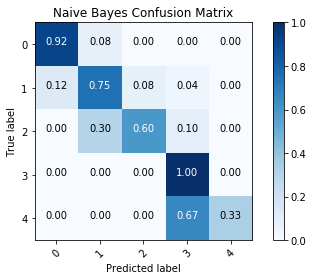


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 2
Confusion matrix:


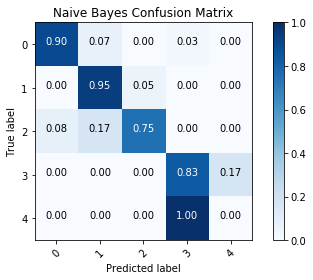


Prediction Performance Measurement

> Accuracy = 87.2%

Fold 3
Confusion matrix:


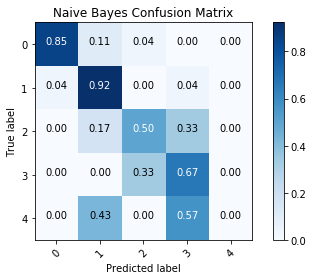


Prediction Performance Measurement

> Accuracy = 74.4%

Fold 4
Confusion matrix:


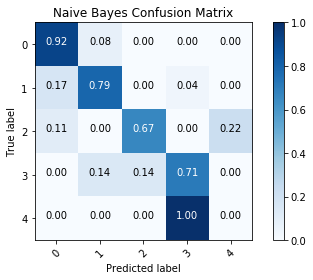


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 5
Confusion matrix:


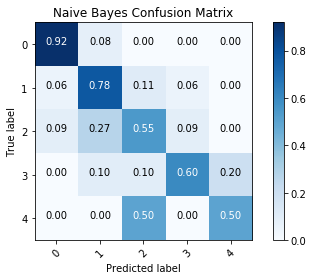


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 6
Confusion matrix:


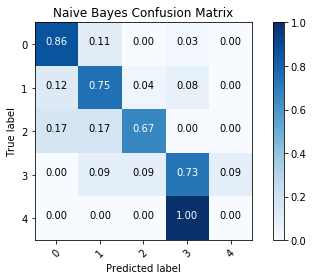


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 7
Confusion matrix:


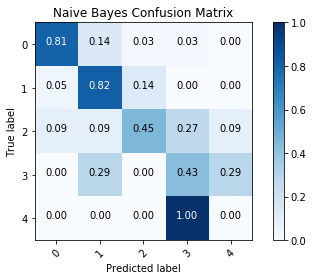


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 8
Confusion matrix:


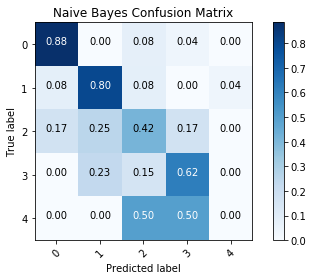


Prediction Performance Measurement

> Accuracy = 71.8%

Fold 9
Confusion matrix:


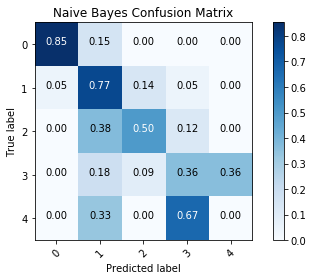


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 10
Confusion matrix:


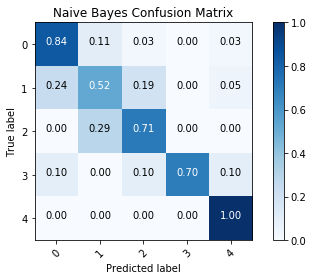


Prediction Performance Measurement

> Accuracy = 72.7%

Akurasi rata-rata: 0.765034965034965


In [24]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

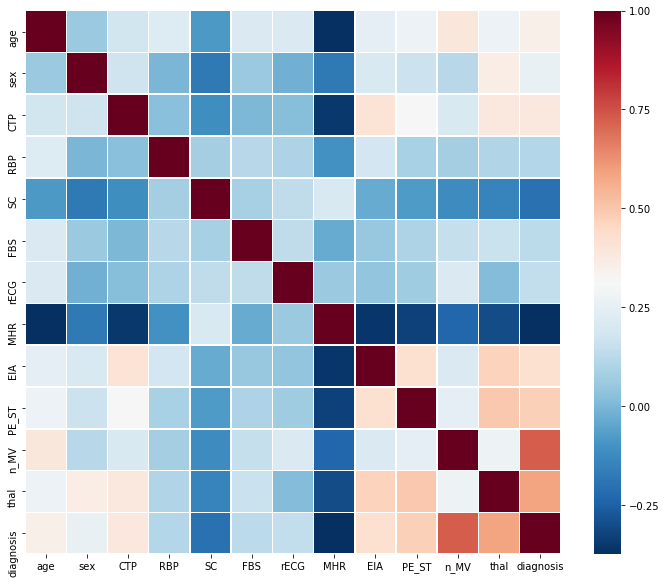

In [25]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

In [26]:
del train_dataset['FBS']

In [27]:
del train_dataset['SC']

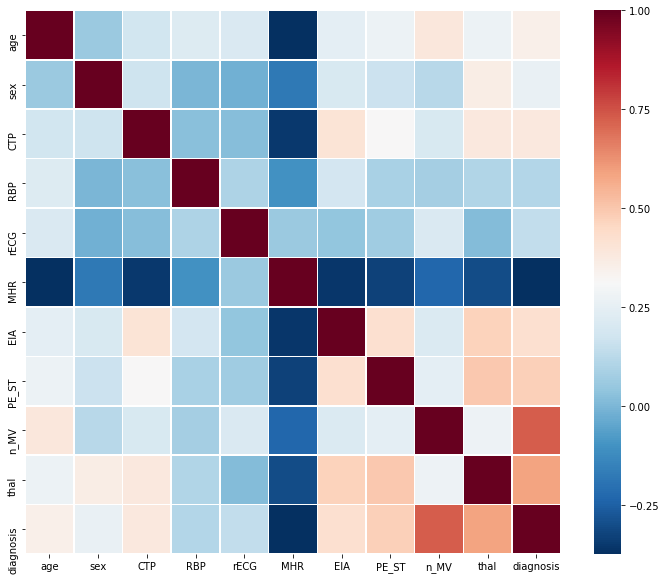

In [28]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

Fold 1
Confusion matrix:


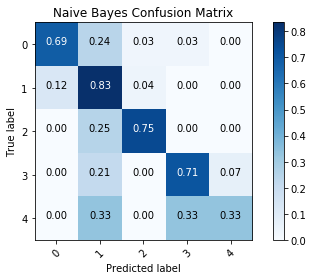


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 2
Confusion matrix:


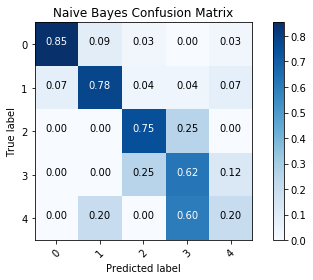


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 3
Confusion matrix:


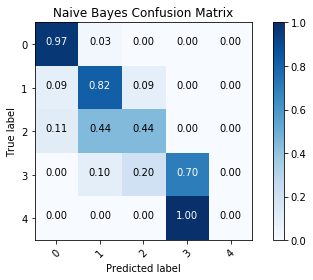


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 4
Confusion matrix:


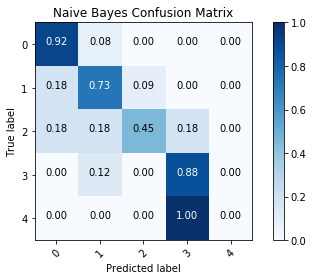


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 5
Confusion matrix:


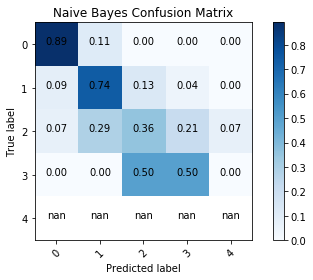


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 6
Confusion matrix:


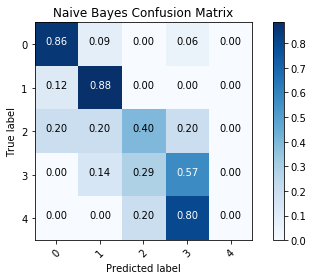


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 7
Confusion matrix:


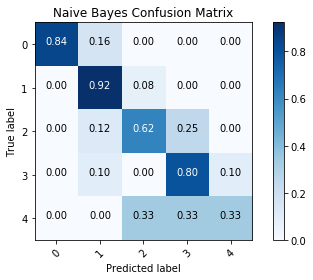


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 8
Confusion matrix:


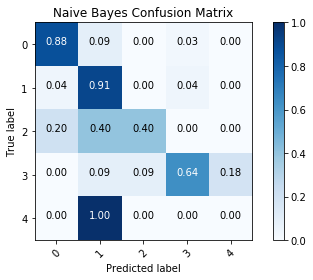


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 9
Confusion matrix:


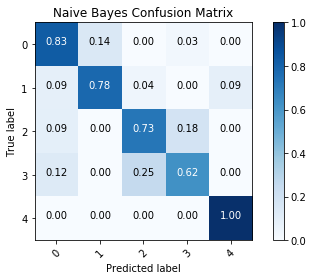


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 10
Confusion matrix:


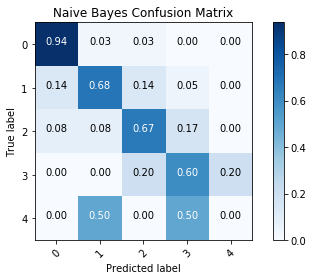


Prediction Performance Measurement

> Accuracy = 75.3%

Akurasi rata-rata: 0.7689144189144189


In [29]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

In [30]:
del train_dataset['MHR']

In [31]:
del train_dataset['RBP']

In [32]:
del train_dataset['rECG']

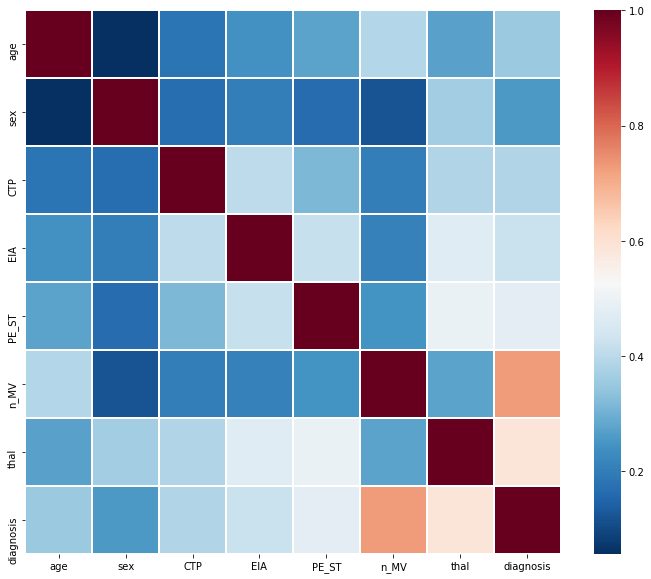

In [33]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

Fold 1
Confusion matrix:


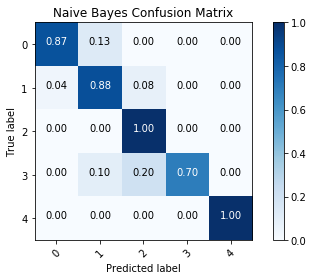


Prediction Performance Measurement

> Accuracy = 85.9%

Fold 2
Confusion matrix:


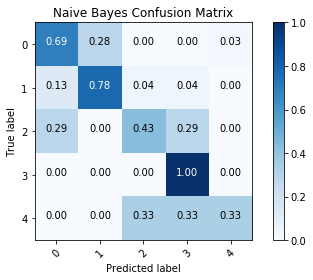


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 3
Confusion matrix:


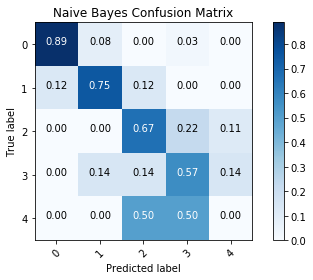


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 4
Confusion matrix:


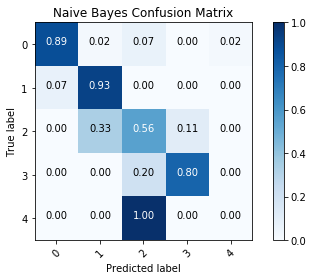


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 5
Confusion matrix:


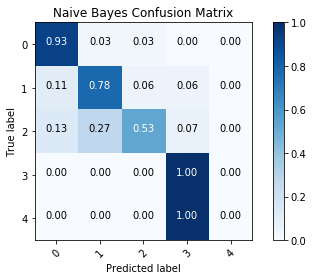


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 6
Confusion matrix:


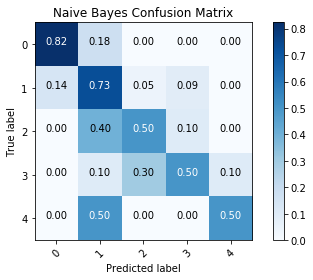


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 7
Confusion matrix:


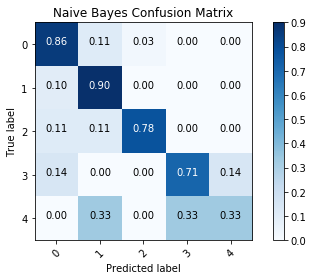


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 8
Confusion matrix:


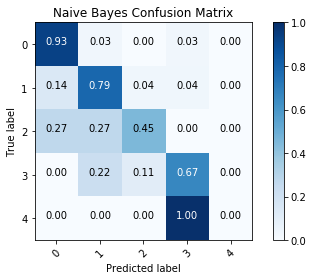


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 9
Confusion matrix:


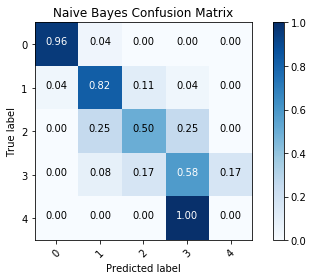


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 10
Confusion matrix:


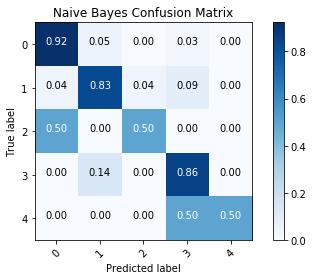


Prediction Performance Measurement

> Accuracy = 84.4%

Akurasi rata-rata: 0.7844155844155845


In [34]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

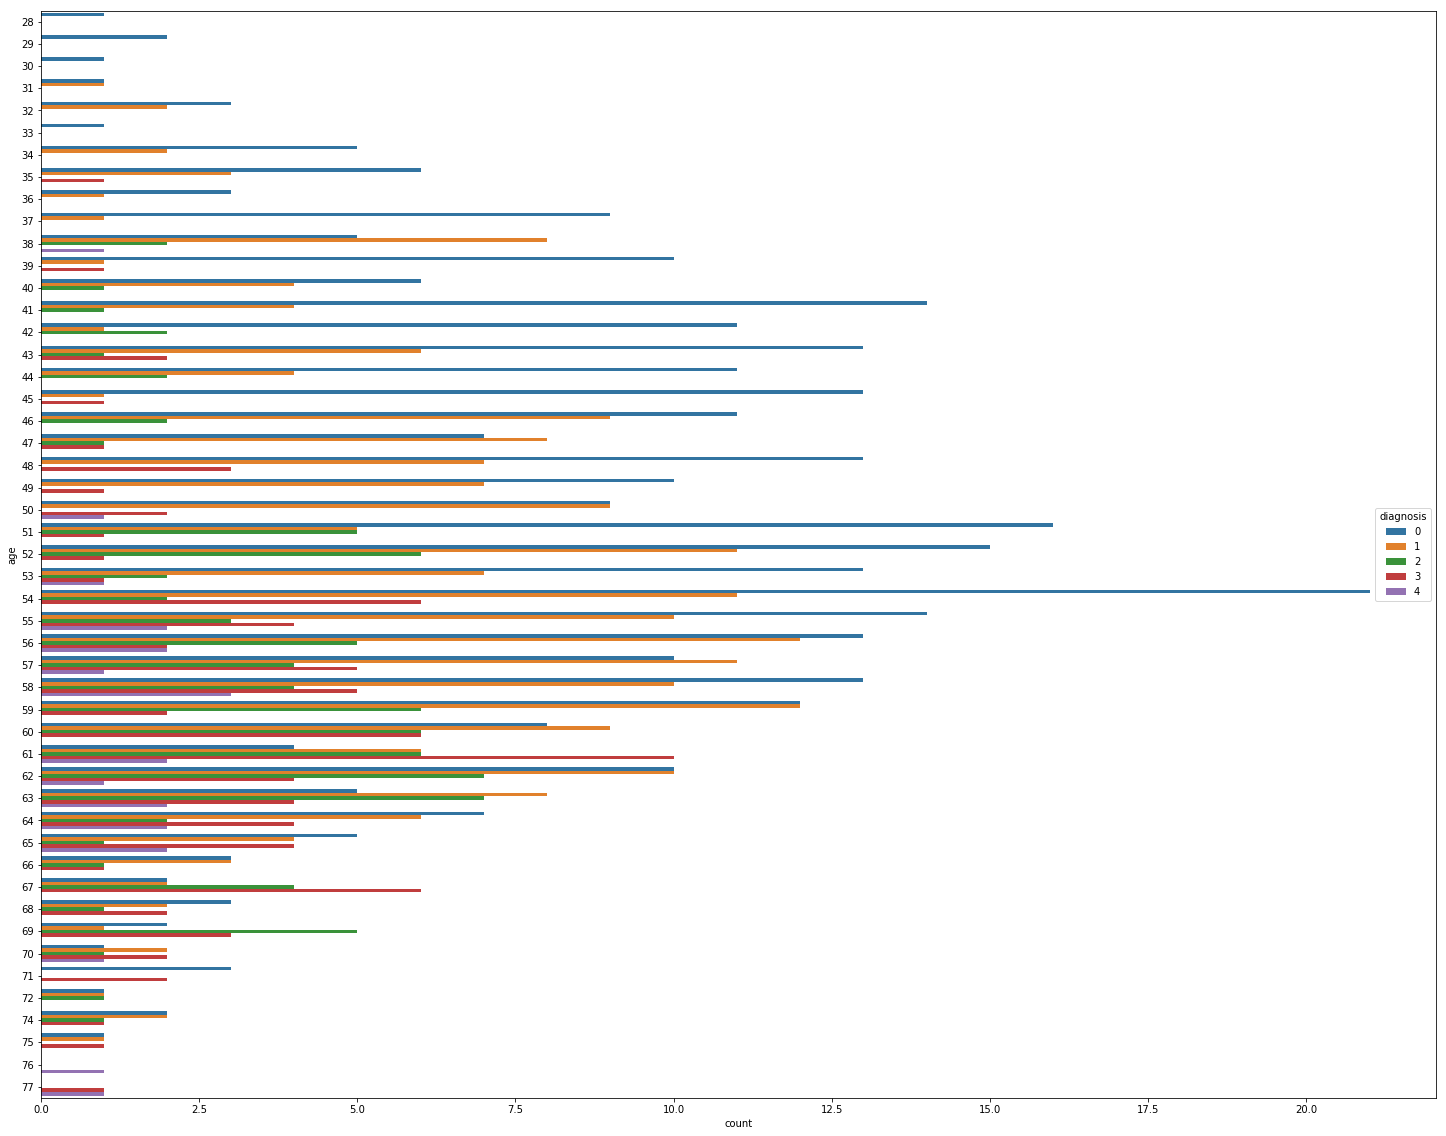

proportion (%)
diagnosis age                
0         54         6.017192
          51         4.584527
          52         4.297994
          41         4.011461
          55         4.011461
          43         3.724928
          45         3.724928
          48         3.724928
          53         3.724928
          56         3.724928
          58         3.724928
          59         3.438395
          42         3.151862
          44         3.151862
          46         3.151862
          39         2.865330
          49         2.865330
          57         2.865330
          62         2.865330
          37         2.578797
          50         2.578797
          60         2.292264
          47         2.005731
          64         2.005731
          35         1.719198
          40         1.719198
          34         1.432665
          38         1.432665
          63         1.432665
          65         1.432665
...                       ...
3         68         2.222222
          70         2.222222
          71         2.222222
          35         1.111111
          39         1.111111
          45         1.111111
          47         1.111111
          49         1.111111
          51         1.111111
          52         1.111111
          53         1.111111
          66         1.111111
          74         1.111111
          75         1.111111
          77         1.111111
4         58        13.043478
          55         8.695652
          56         8.695652
          61         8.695652
          63         8.695652
          64         8.695652
          65         8.695652
          38         4.347826
          50         4.347826
          53         4.347826
          57         4.347826
          62         4.347826
          70         4.347826
          76         4.347826
          77         4.347826

[166 rows x 1 columns]

In [35]:
# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='age', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
diagnosis_group = train_dataset.groupby(['diagnosis'])
proportion = diagnosis_group.age.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

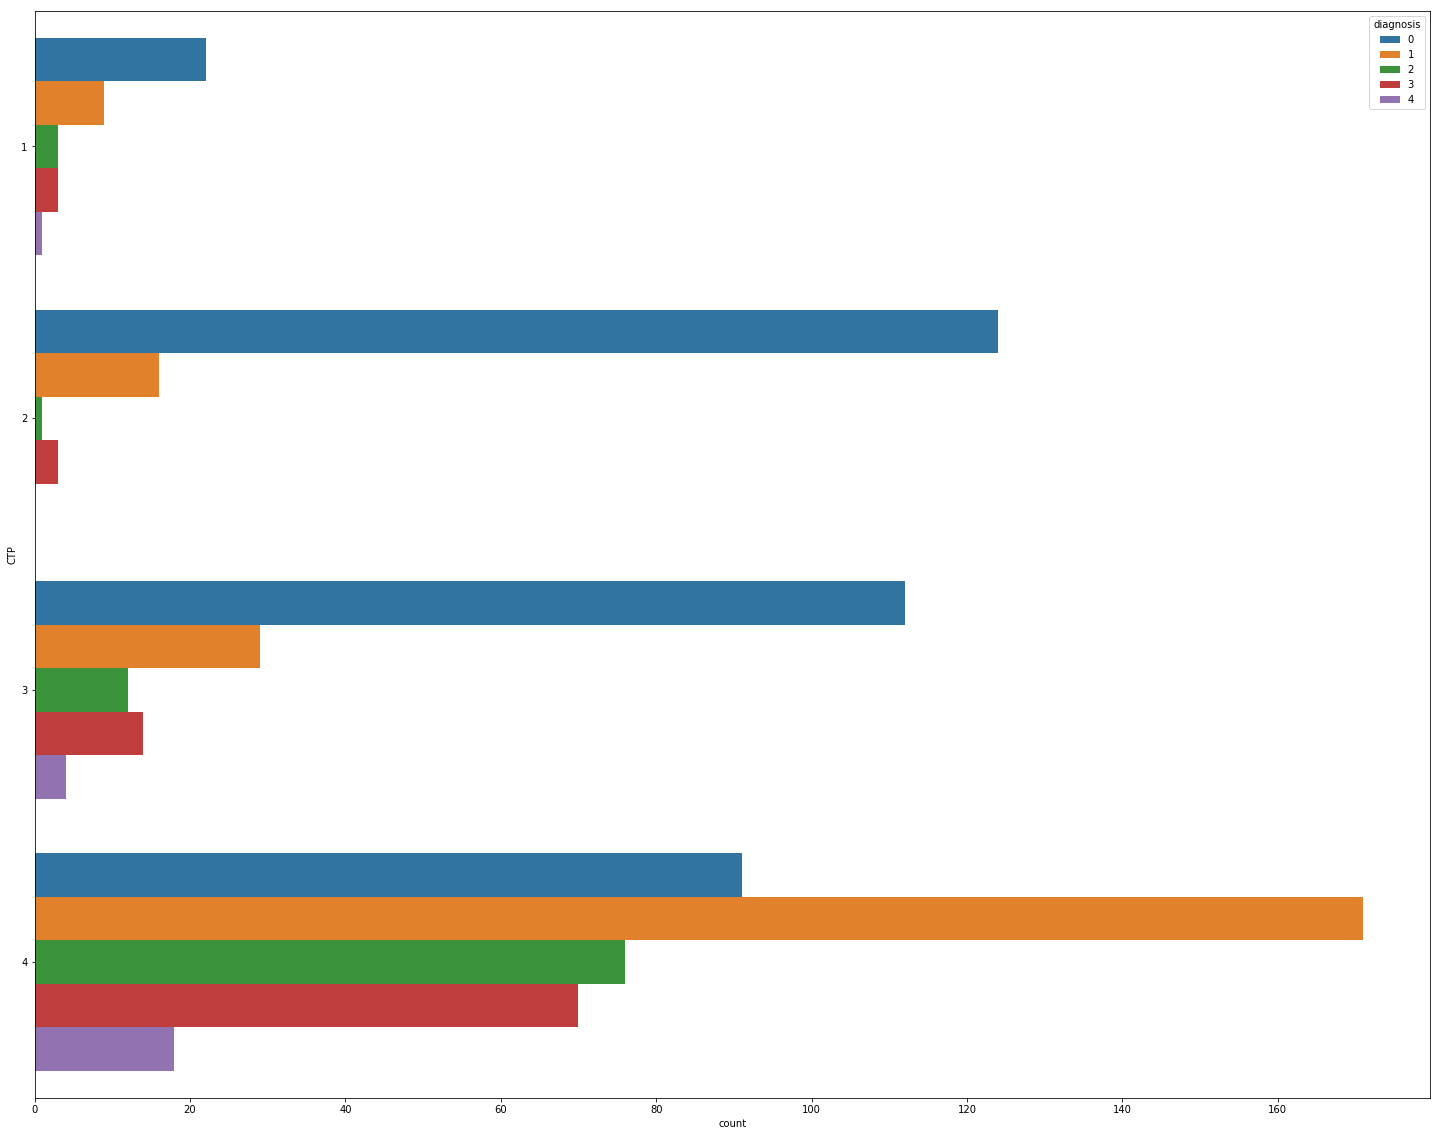

proportion (%)
diagnosis CTP                
0         2         35.530086
          3         32.091691
          4         26.074499
          1          6.303725
1         4         76.000000
          3         12.888889
          2          7.111111
          1          4.000000
2         4         82.608696
          3         13.043478
          1          3.260870
          2          1.086957
3         4         77.777778
          3         15.555556
          1          3.333333
          2          3.333333
4         4         78.260870
          3         17.391304
          1          4.347826

In [36]:
# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='CTP', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
diagnosis_group = train_dataset.groupby(['diagnosis'])
proportion = diagnosis_group.CTP.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [37]:
# Hitung Korelasi CTP
train_dataset['CTP'].corr(train_dataset['diagnosis'])

0.3878274369182737

In [38]:
ctp = pd.get_dummies(train_dataset['CTP'])
ctp['ctp2'] = ctp[2]
ctp['ctp4'] = ctp[4]
ctp['ctp1'] = ctp[1]
ctp['ctp3'] = ctp[3]
del ctp[1]
del ctp[3]
del ctp[2]
del ctp[4]
train_dataset = pd.concat([train_dataset, ctp], axis=1)

In [39]:
ctp

,ctp2,ctp4,ctp1,ctp3
2,0,0,0,1
3,0,0,0,1
5,0,1,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,0,1
13,1,0,0,0
21,1,0,0,0
24,0,0,0,1
25,0,0,0,1


In [40]:
# Hitung Korelasi CTP
train_dataset['ctp2'].corr(train_dataset['diagnosis'])

-0.3358533414030551

In [41]:
# Hitung Korelasi CTP
train_dataset['ctp4'].corr(train_dataset['diagnosis'])

0.41572271659025334

In [42]:
# Hitung Korelasi CTP
train_dataset['ctp1'].corr(train_dataset['diagnosis'])

-0.05034630759064805

In [43]:
# Hitung Korelasi CTP
train_dataset['ctp3'].corr(train_dataset['diagnosis'])

-0.15880229806075957

In [44]:
del train_dataset['CTP']
del train_dataset['ctp1']
del train_dataset['ctp2']
del train_dataset['ctp3']

In [45]:
target = train_dataset['diagnosis'].copy()
del train_dataset['diagnosis']
train_dataset = pd.concat([train_dataset, target], axis=1)

Fold 1
Confusion matrix:


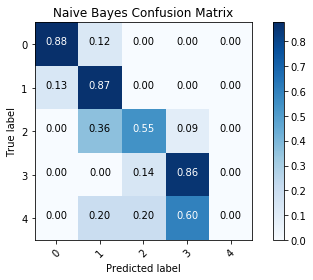


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 2
Confusion matrix:


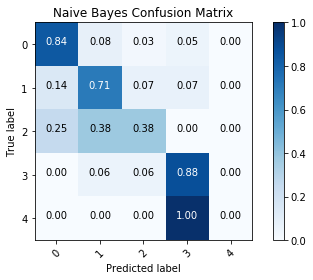


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 3
Confusion matrix:


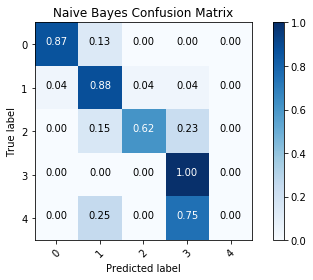


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 4
Confusion matrix:


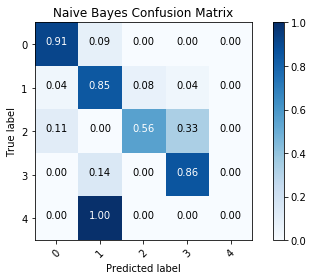


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 5
Confusion matrix:


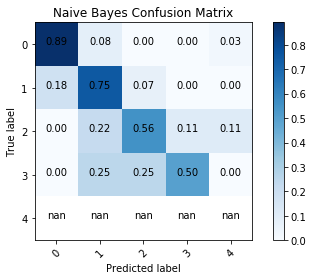


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 6
Confusion matrix:


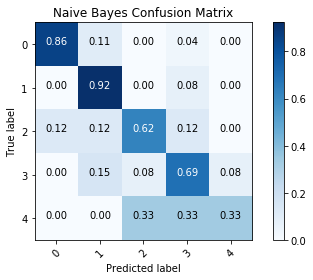


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 7
Confusion matrix:


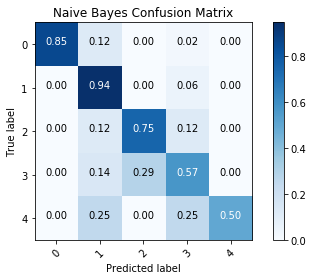


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 8
Confusion matrix:


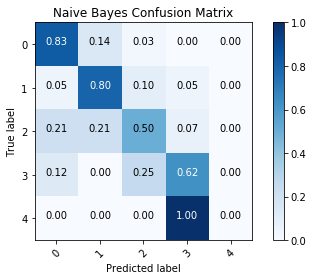


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 9
Confusion matrix:


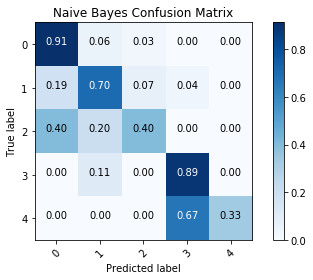


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 10
Confusion matrix:


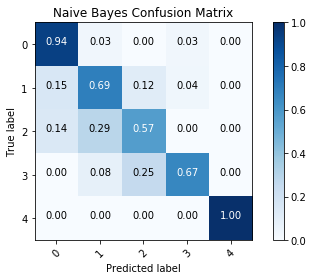


Prediction Performance Measurement

> Accuracy = 77.9%

Akurasi rata-rata: 0.7868964368964368


In [46]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

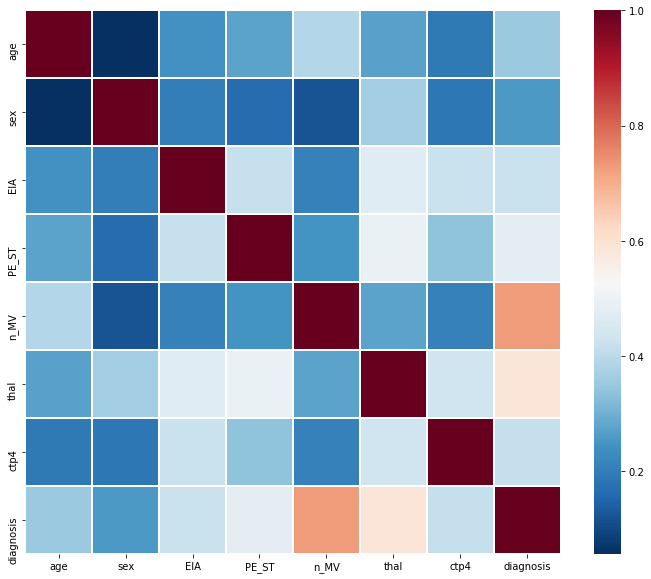

In [47]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

In [48]:
thal = pd.get_dummies(train_dataset['thal'])
thal['normal'] = thal[3]
thal['fixed defect'] = thal[6]
thal['reversable defect'] = thal[7]
del thal[3]
del thal[6]
del thal[7]
train_dataset = pd.concat([train_dataset, thal], axis=1)

In [49]:
# Hitung Korelasi thal normal
train_dataset['normal'].corr(train_dataset['diagnosis'])

-0.5938878967269421

In [50]:
# Hitung Korelasi thal fixed defect
train_dataset['fixed defect'].corr(train_dataset['diagnosis'])

0.12109700044938028

In [51]:
# Hitung Korelasi thal reversable defect
train_dataset['reversable defect'].corr(train_dataset['diagnosis'])

0.5393757166913498

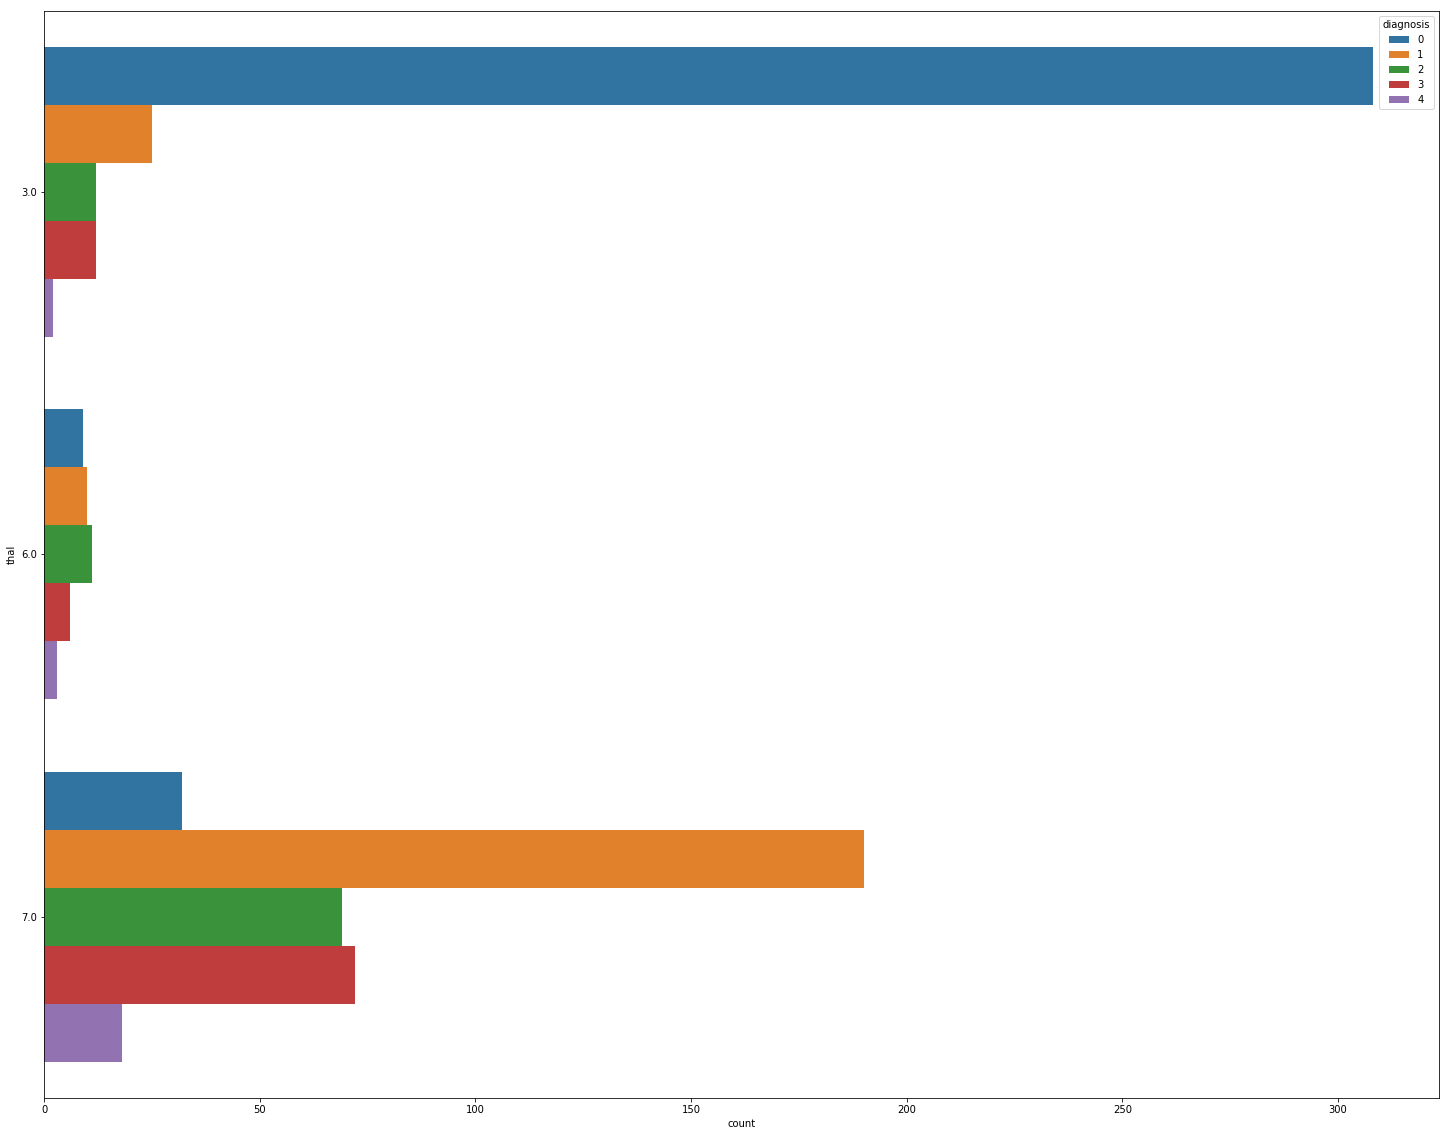

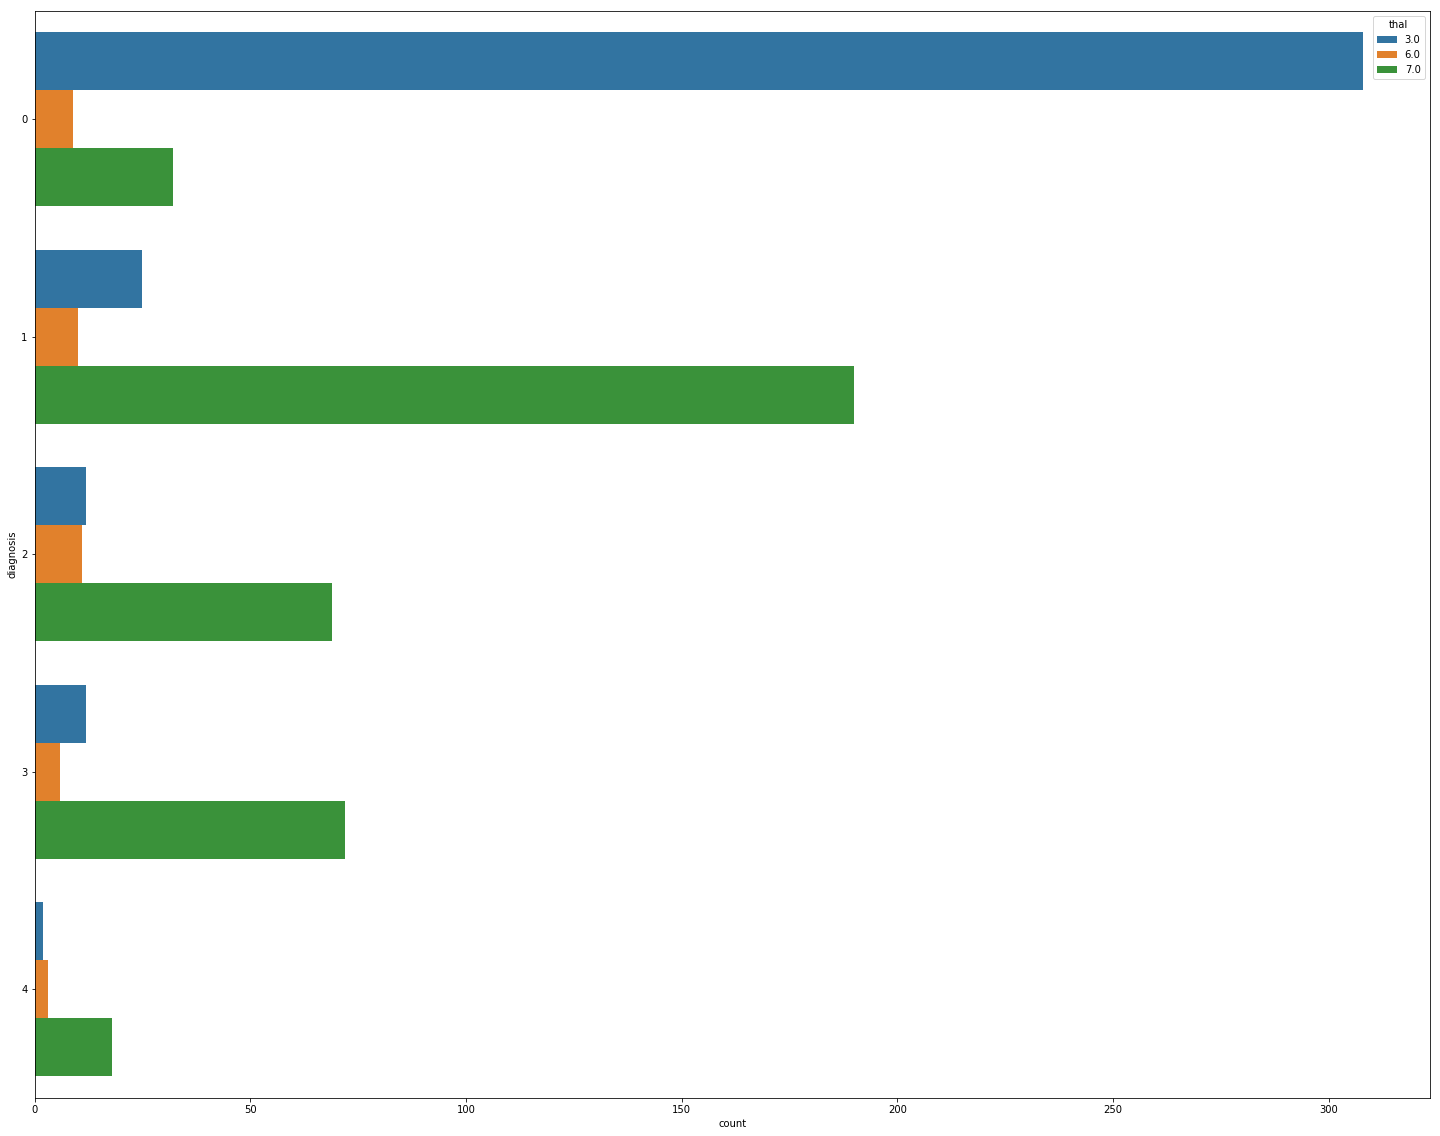

proportion (%)
diagnosis thal                
0         3.0        88.252149
          7.0         9.169054
          6.0         2.578797
1         7.0        84.444444
          3.0        11.111111
          6.0         4.444444
2         7.0        75.000000
          3.0        13.043478
          6.0        11.956522
3         7.0        80.000000
          3.0        13.333333
          6.0         6.666667
4         7.0        78.260870
          6.0        13.043478
          3.0         8.695652

In [52]:
# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='thal', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='diagnosis', hue='thal', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
diagnosis_group = train_dataset.groupby(['diagnosis'])
proportion = diagnosis_group.thal.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [53]:
del train_dataset['thal']
del train_dataset['fixed defect']

In [54]:
train_dataset

,age,sex,EIA,PE_ST,n_MV,ctp4,diagnosis,normal,reversable defect
2,54,0,0.0,1.0,0.0,0,0,1,0
3,48,0,0.0,1.0,0.0,0,0,1,0
5,64,0,0.0,2.0,2.0,1,0,1,0
7,58,1,0.0,1.0,0.0,0,0,1,0
8,42,1,0.0,1.0,0.0,0,0,1,0
9,54,1,0.0,2.0,0.0,0,0,0,1
13,55,0,0.0,1.0,0.0,0,0,1,0
21,45,0,0.0,2.0,0.0,0,0,1,0
24,51,0,0.0,1.0,0.0,0,0,1,0
25,53,1,0.0,1.0,0.0,0,0,0,0


In [55]:
target = train_dataset['diagnosis'].copy()
del train_dataset['diagnosis']
train_dataset = pd.concat([train_dataset, target], axis=1)

Fold 1
Confusion matrix:


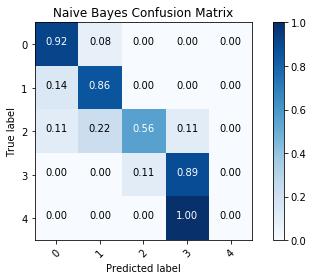


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 2
Confusion matrix:


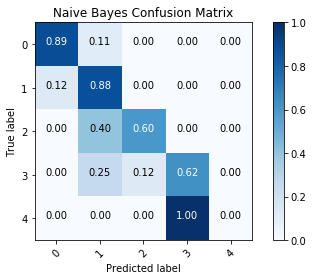


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 3
Confusion matrix:


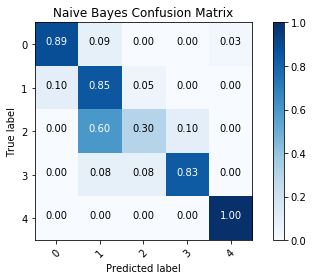


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 4
Confusion matrix:


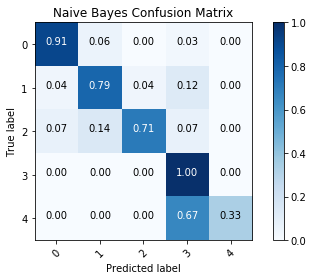


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 5
Confusion matrix:


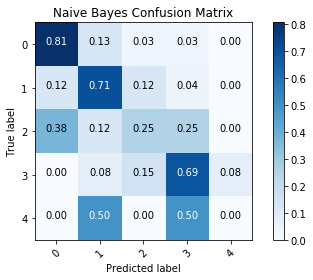


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 6
Confusion matrix:


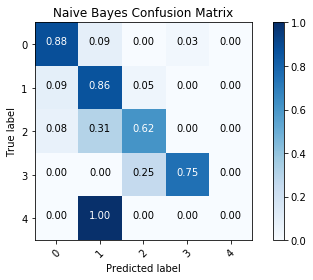


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 7
Confusion matrix:


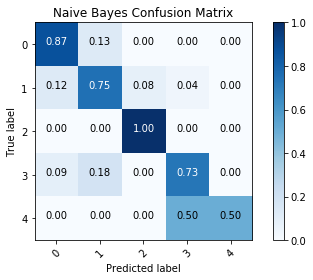


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 8
Confusion matrix:


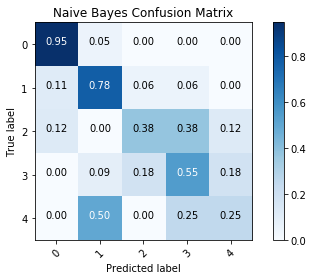


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 9
Confusion matrix:


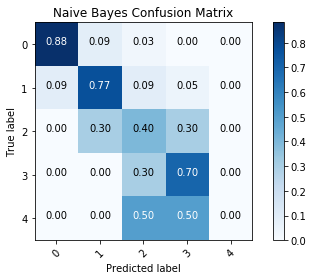


Prediction Performance Measurement

> Accuracy = 74.4%

Fold 10
Confusion matrix:


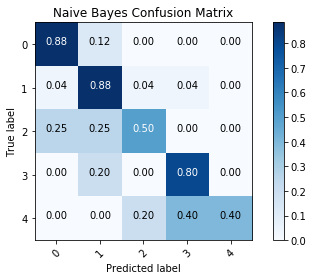


Prediction Performance Measurement

> Accuracy = 80.5%

Akurasi rata-rata: 0.7856476856476856


In [56]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

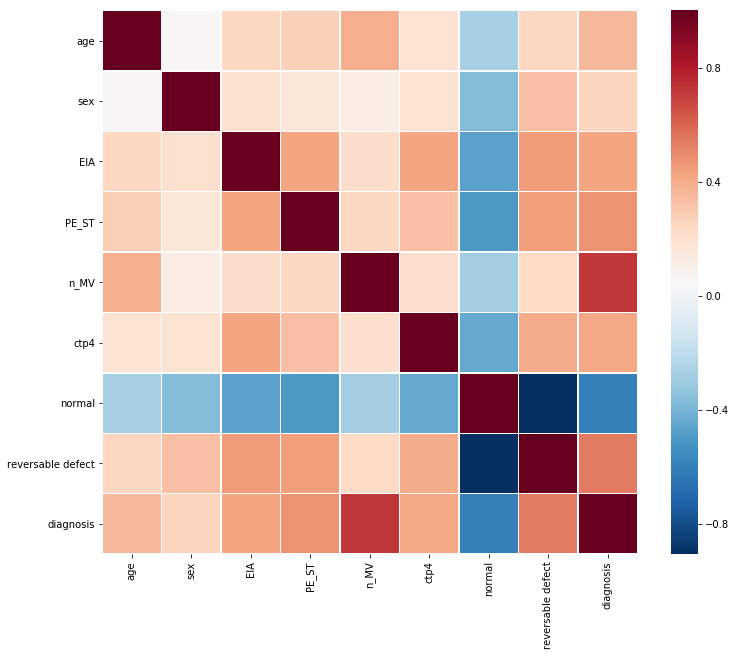

In [57]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

In [58]:
nmv = pd.get_dummies(train_dataset['n_MV'])
nmv['nmv 0'] = nmv[0.0]
nmv['nmv 1'] = nmv[1.0]
nmv['nmv 2'] = nmv[2.0]
nmv['nmv 3'] = nmv[3.0]

del nmv[0.0]
del nmv[1.0]
del nmv[2.0]
del nmv[3.0]

train_dataset = pd.concat([train_dataset, nmv], axis=1)

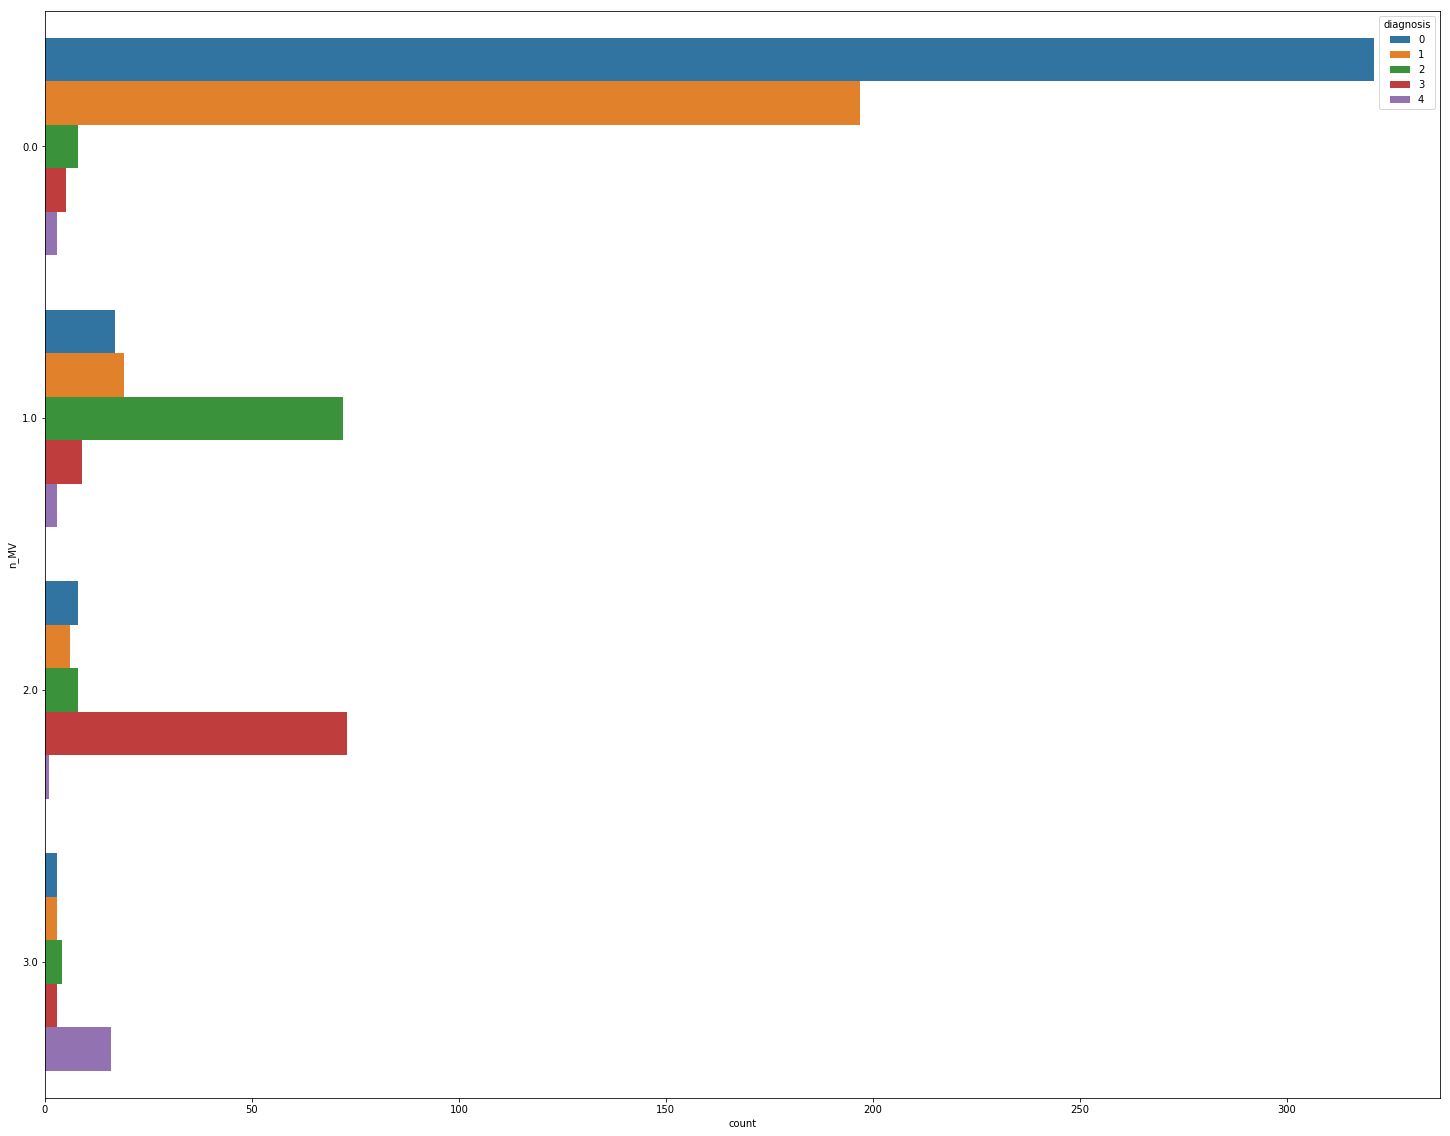

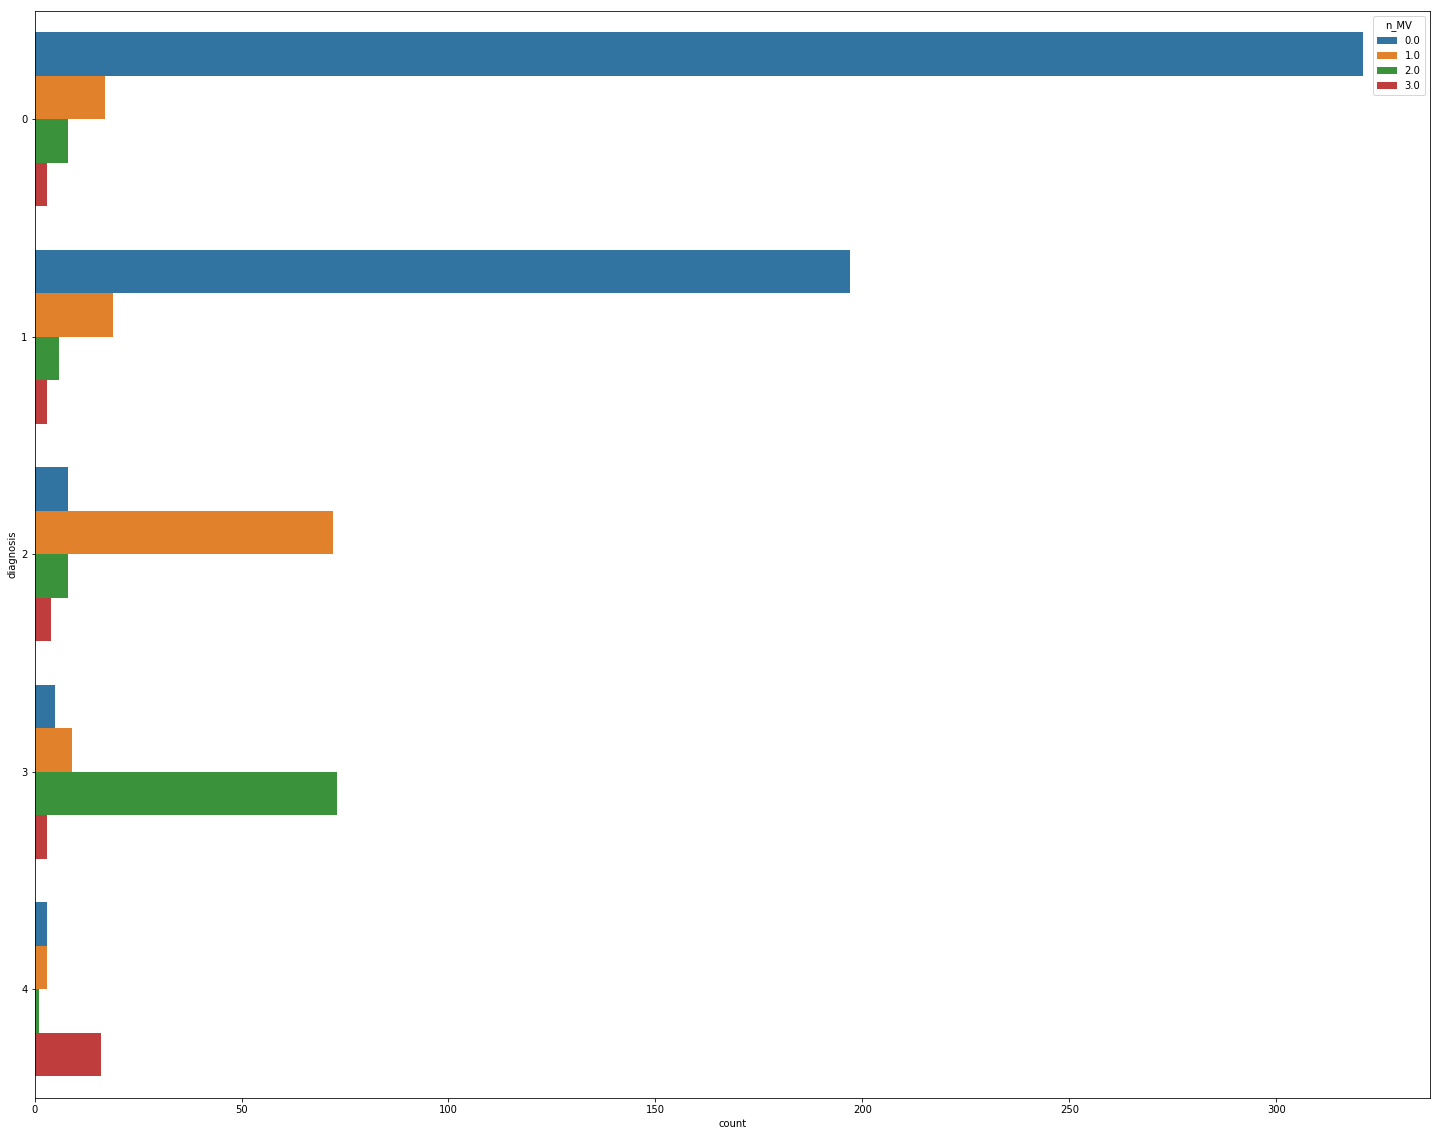

proportion (%)
diagnosis n_MV                
0         0.0        91.977077
          1.0         4.871060
          2.0         2.292264
          3.0         0.859599
1         0.0        87.555556
          1.0         8.444444
          2.0         2.666667
          3.0         1.333333
2         1.0        78.260870
          0.0         8.695652
          2.0         8.695652
          3.0         4.347826
3         2.0        81.111111
          1.0        10.000000
          0.0         5.555556
          3.0         3.333333
4         3.0        69.565217
          0.0        13.043478
          1.0        13.043478
          2.0         4.347826

In [59]:
# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='n_MV', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan grafik distribusi
plt.figure(figsize = (25,20))
sns.countplot(y='diagnosis', hue='n_MV', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
diagnosis_group = train_dataset.groupby(['diagnosis'])
proportion = diagnosis_group.n_MV.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [60]:
# Hitung Korelasi nmv 0
train_dataset['nmv 0'].corr(train_dataset['diagnosis'])

-0.7012493364902761

In [61]:
# Hitung Korelasi nmv 1
train_dataset['nmv 1'].corr(train_dataset['diagnosis'])

0.2602046084885632

In [62]:
# Hitung Korelasi nmv 2
train_dataset['nmv 2'].corr(train_dataset['diagnosis'])

0.5149446699553853

In [63]:
# Hitung Korelasi nmv 3
train_dataset['nmv 3'].corr(train_dataset['diagnosis'])

0.32963591528731084

In [64]:
target = train_dataset['diagnosis'].copy()
del train_dataset['diagnosis']
train_dataset = pd.concat([train_dataset, target], axis=1)

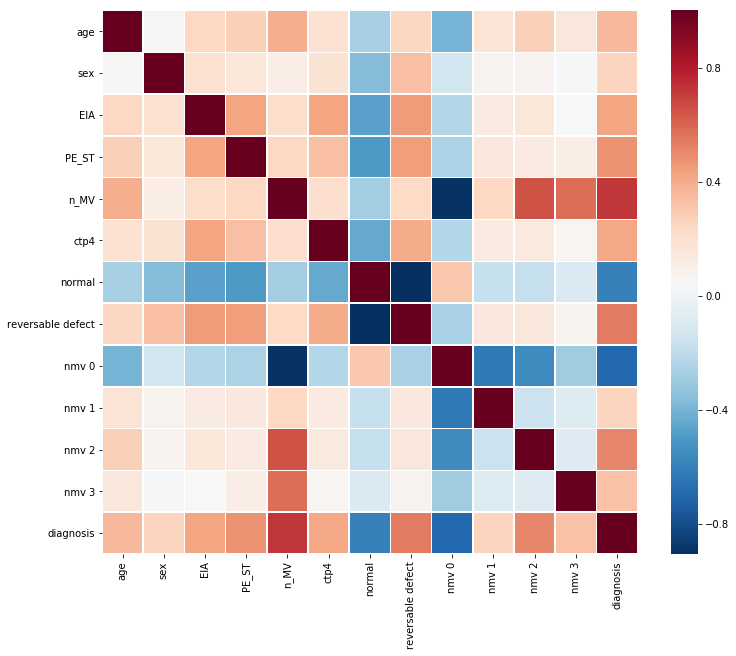

In [65]:
plt.figure(figsize = (12, 10))
sns.heatmap(train_dataset.corr(), cmap='RdBu_r', linewidths=.5)
plt.show()

In [66]:
del train_dataset['n_MV']

Fold 1
Confusion matrix:


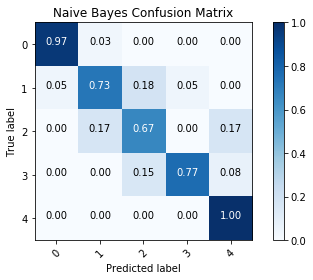


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 2
Confusion matrix:


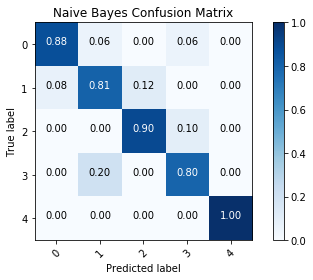


Prediction Performance Measurement

> Accuracy = 85.9%

Fold 3
Confusion matrix:


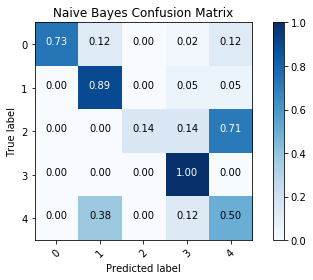


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 4
Confusion matrix:


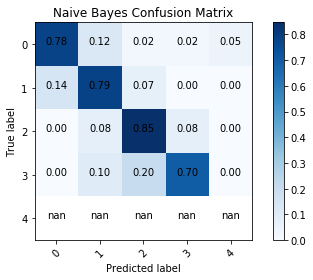


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 5
Confusion matrix:


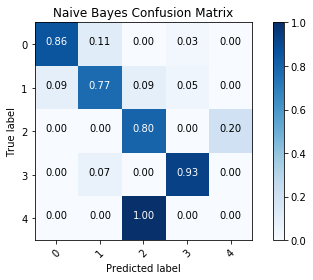


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 6
Confusion matrix:


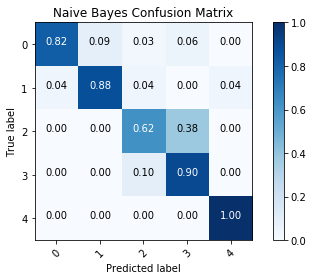


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 7
Confusion matrix:


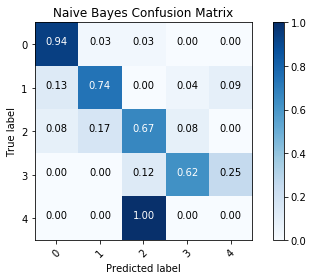


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 8
Confusion matrix:


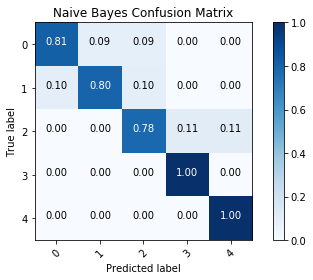


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 9
Confusion matrix:


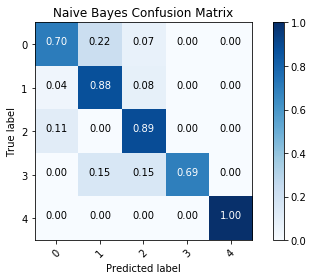


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 10
Confusion matrix:


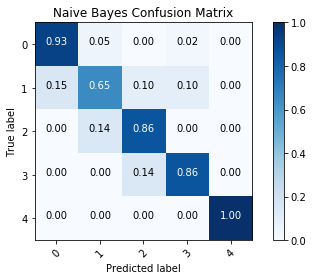


Prediction Performance Measurement

> Accuracy = 84.4%

Akurasi rata-rata: 0.8087745587745587


In [67]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

Fold 1
Confusion matrix:


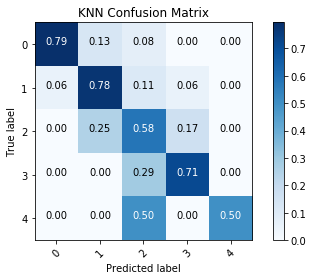


Prediction Performance Measurement

> Accuracy = 74.4%

Fold 2
Confusion matrix:


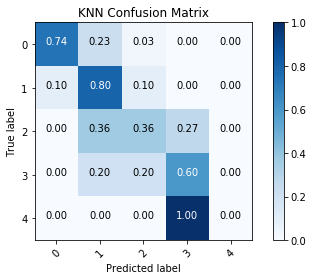


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 3
Confusion matrix:


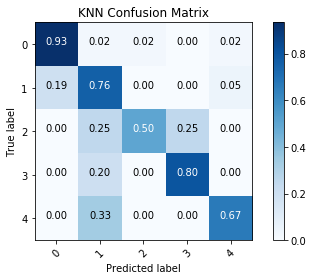


Prediction Performance Measurement

> Accuracy = 84.6%

Fold 4
Confusion matrix:


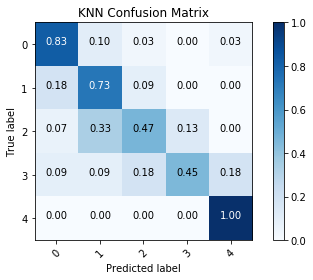


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 5
Confusion matrix:


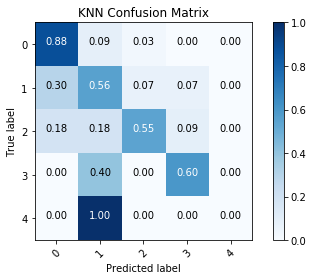


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 6
Confusion matrix:


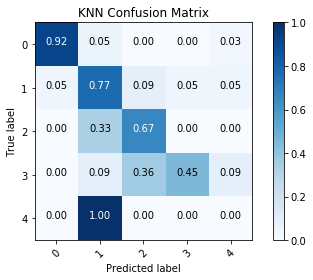


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 7
Confusion matrix:


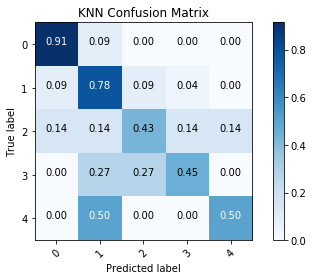


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 8
Confusion matrix:


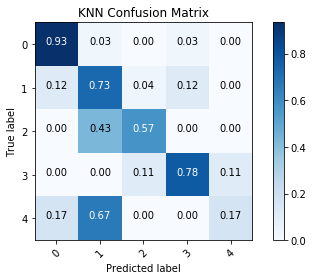


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 9
Confusion matrix:


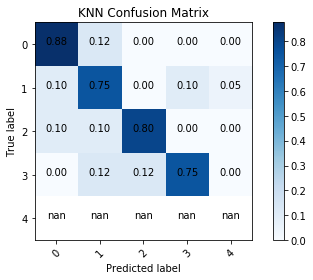


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 10
Confusion matrix:


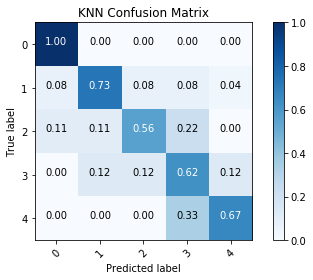


Prediction Performance Measurement

> Accuracy = 79.2%

Akurasi rata-rata: 0.7535797535797536


In [72]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = tree.DecisionTreeClassifier(criterion="entropy")
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='KNN Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

Fold 1
Confusion matrix:


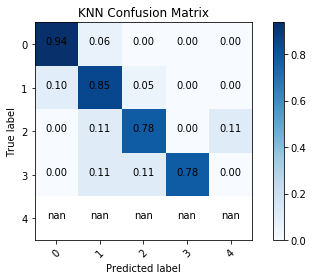


Prediction Performance Measurement

> Accuracy = 85.9%

Fold 2
Confusion matrix:


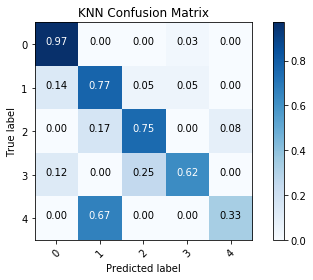


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 3
Confusion matrix:


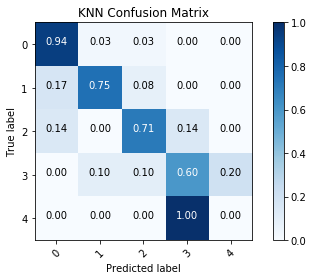


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 4
Confusion matrix:


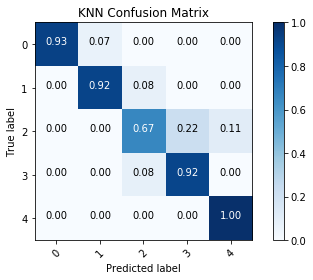


Prediction Performance Measurement

> Accuracy = 89.7%

Fold 5
Confusion matrix:


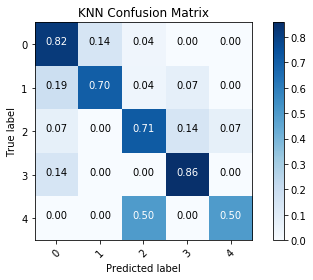


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 6
Confusion matrix:


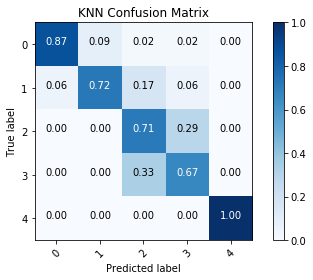


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 7
Confusion matrix:


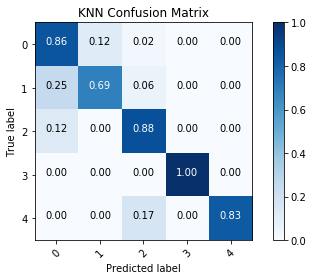


Prediction Performance Measurement

> Accuracy = 83.3%

Fold 8
Confusion matrix:


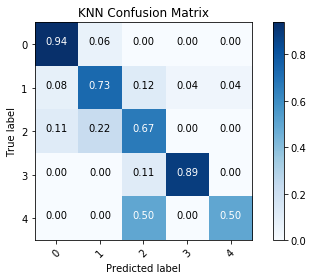


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 9
Confusion matrix:


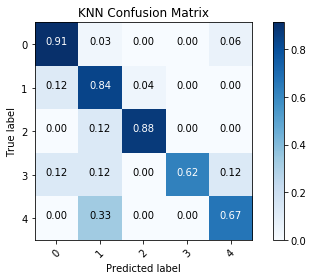


Prediction Performance Measurement

> Accuracy = 84.6%

Fold 10
Confusion matrix:


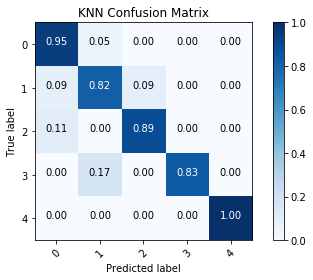


Prediction Performance Measurement

> Accuracy = 89.6%

Akurasi rata-rata: 0.8344821844821844


In [76]:
X, y = train_dataset.values[:,:-1], train_dataset.values[:, -1]
kf = KFold(n_splits=10, shuffle=True)
gnb = MLPClassifier(solver='adam', hidden_layer_sizes=(350, 150))
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='KNN Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

Finding The Best K


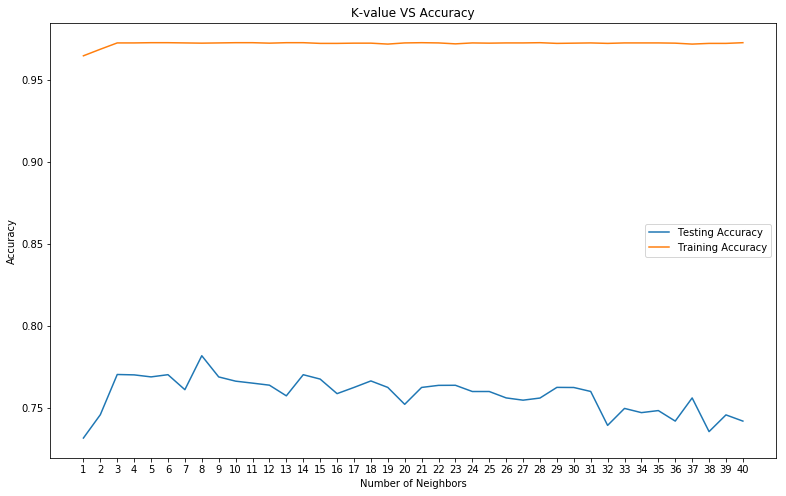

Best accuracy is 0.7818181818181819 with K = 8


In [70]:
print('Finding The Best K')
# Model complexity
neig = np.arange(1, 41)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
    train_acc = 0
    test_acc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn = knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        train_acc += knn.score(X_train, y_train)
        test_acc += knn.score(X_test, y_test)
    
    # train accuracy
    train_accuracy.append(train_acc/10)
    # test accuracy
    test_accuracy.append(test_acc/10)

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
Best_K = 1+test_accuracy.index(np.max(test_accuracy))

Fold 1
Confusion matrix:


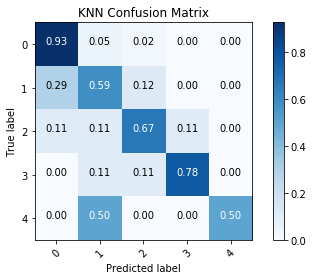


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 2
Confusion matrix:


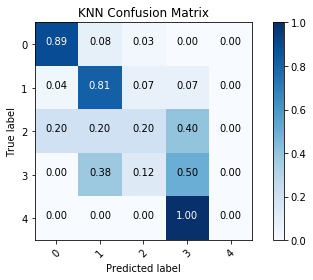


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 3
Confusion matrix:


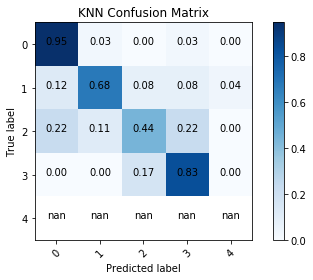


Prediction Performance Measurement

> Accuracy = 79.5%

Fold 4
Confusion matrix:


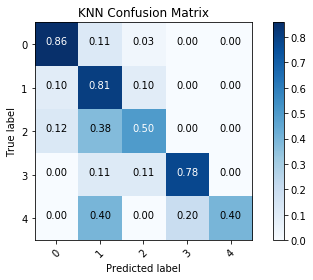


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 5
Confusion matrix:


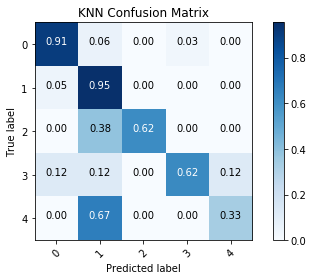


Prediction Performance Measurement

> Accuracy = 82.1%

Fold 6
Confusion matrix:


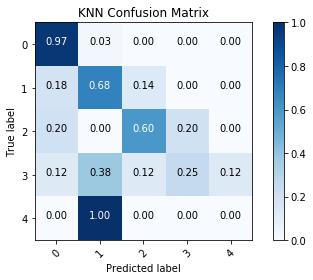


Prediction Performance Measurement

> Accuracy = 74.4%

Fold 7
Confusion matrix:


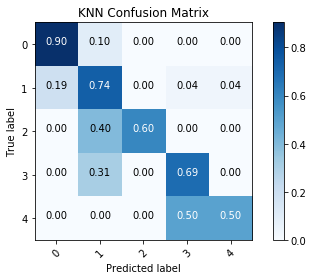


Prediction Performance Measurement

> Accuracy = 78.2%

Fold 8
Confusion matrix:


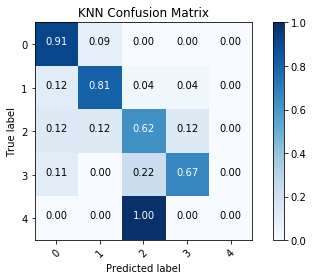


Prediction Performance Measurement

> Accuracy = 80.8%

Fold 9
Confusion matrix:


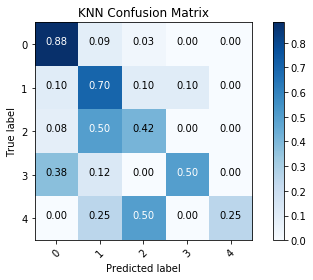


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 10
Confusion matrix:


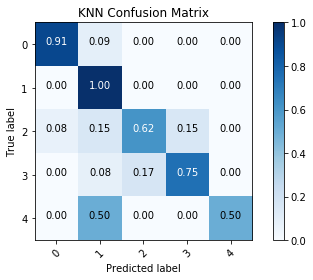


Prediction Performance Measurement

> Accuracy = 84.4%

Akurasi rata-rata: 0.7805694305694304


In [71]:
knn = KNeighborsClassifier(n_neighbors=Best_K, p=1, weights='distance')
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='KNN Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', sum/10)